<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Exercise_10_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean, cosine
from pandas.api.types import CategoricalDtype

# Question 1

## Remove columns

In [20]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [21]:
metadata_cols = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']
df_metadata = df[metadata_cols].copy()
df = df.drop(columns=metadata_cols)

In [22]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [23]:
df_metadata.head()

,Unnamed: 0,track_id,artists,album_name,track_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On


## One-Hot Encoding on Genres

In [24]:
df_metadata['track_genre'] = df['track_genre'].copy()
possible_genres = df['track_genre'].unique()
cat_type = CategoricalDtype(categories=possible_genres)
df['track_genre'] = df['track_genre'].astype(cat_type)
df = pd.get_dummies(df, columns=['track_genre'])

In [25]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,False,False,False,False,False,False,False,False,False,False


# Question 2

## Missing value check

In [26]:
print(f"Missing values: {df.isnull().sum().sum()}")
df = df.dropna()

Missing values: 0


## Non-numeric value check

In [27]:
for column in df.columns:
    df[column] = df[column].astype(float)

print(f"Final shape before normalization: {df.shape}")

Final shape before normalization: (114000, 129)


## Normalization

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

In [29]:
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1.782627,0.024575,-0.305767,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
1,0.975633,-0.730859,-0.305767,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
2,1.065299,-0.160332,-0.305767,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
3,1.692961,-0.243214,-0.305767,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
4,2.186125,-0.271919,-0.305767,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.548691,1.462944,-0.305767,-2.274962,-1.615656,-0.086838,-1.617326,0.753988,-0.401507,0.977652,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146
113996,-0.503858,1.462953,-0.305767,-2.263437,-2.084789,-1.491343,-2.000082,-1.326281,-0.421369,2.042245,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146
113997,-0.503858,0.404827,-0.305767,0.358416,-1.241940,-1.491343,-0.524135,-1.326281,-0.403399,1.660315,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146
113998,0.347970,0.520646,-0.305767,0.116398,-0.538241,0.474964,-0.522942,0.753988,-0.519731,0.198754,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,10.630146


# Question 3

In [30]:
k_values = [2, 3, 5, 7, 10, 15, 20]
sse_values = []
seed = 42

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=seed, init='k-means++', n_init=10)
    kmeans.fit(df)
    sse_values.append(kmeans.inertia_)

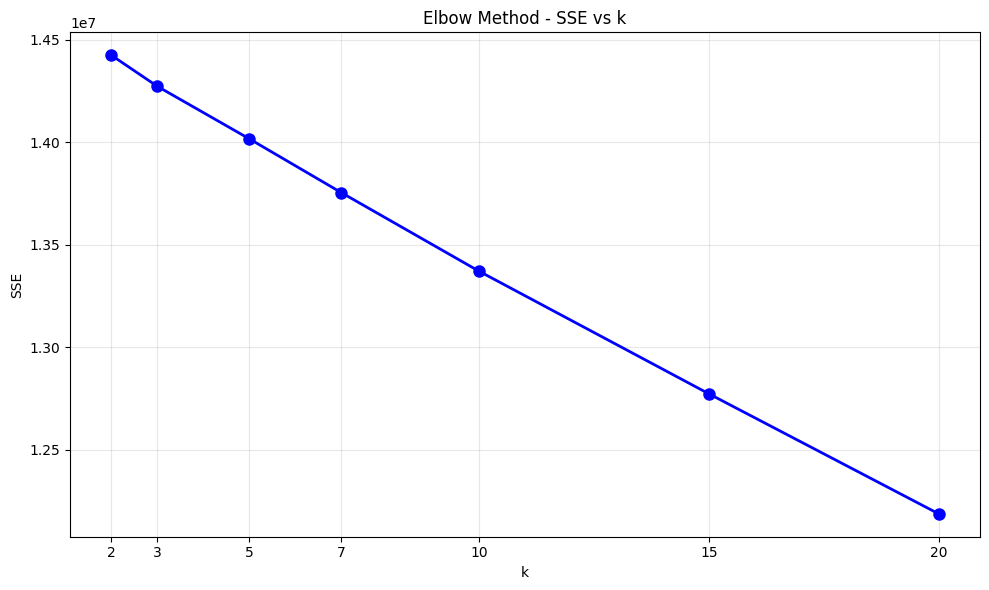

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method - SSE vs k')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

# Question 4

In [32]:
optimal_k = 15
kmeans_final = KMeans(n_clusters=optimal_k, random_state=seed, init='k-means++', n_init=10)
kmeans_final.fit(df)
df_metadata['cluster'] = kmeans_final.labels_

# Question 5

In [33]:
cluster_results = []
for cluster_id in range(optimal_k):
    cluster_data = df_metadata[df_metadata['cluster'] == cluster_id]
    top_genre = cluster_data['track_genre'].value_counts().idxmax()
    percentage = (cluster_data['track_genre'].value_counts().max() / len(cluster_data)) * 100
    cluster_results.append({'Cluster': cluster_id, 'Genre': top_genre, 'Percentage': percentage})

df_results = pd.DataFrame(cluster_results)
print(df_results)

    Cluster          Genre  Percentage
0         0    death-metal   33.333333
1         1        electro    6.697027
2         2       acoustic    7.719027
3         3          sleep   14.134126
4         4       afrobeat   11.113581
5         5         brazil    7.797879
6         6      bluegrass   20.000000
7         7          dance   14.285714
8         8         comedy  100.000000
9         9    black-metal   25.000000
10       10       alt-rock    6.570734
11       11        dubstep   20.000000
12       12          j-pop   12.509382
13       13  chicago-house   19.960080
14       14            emo   25.000000


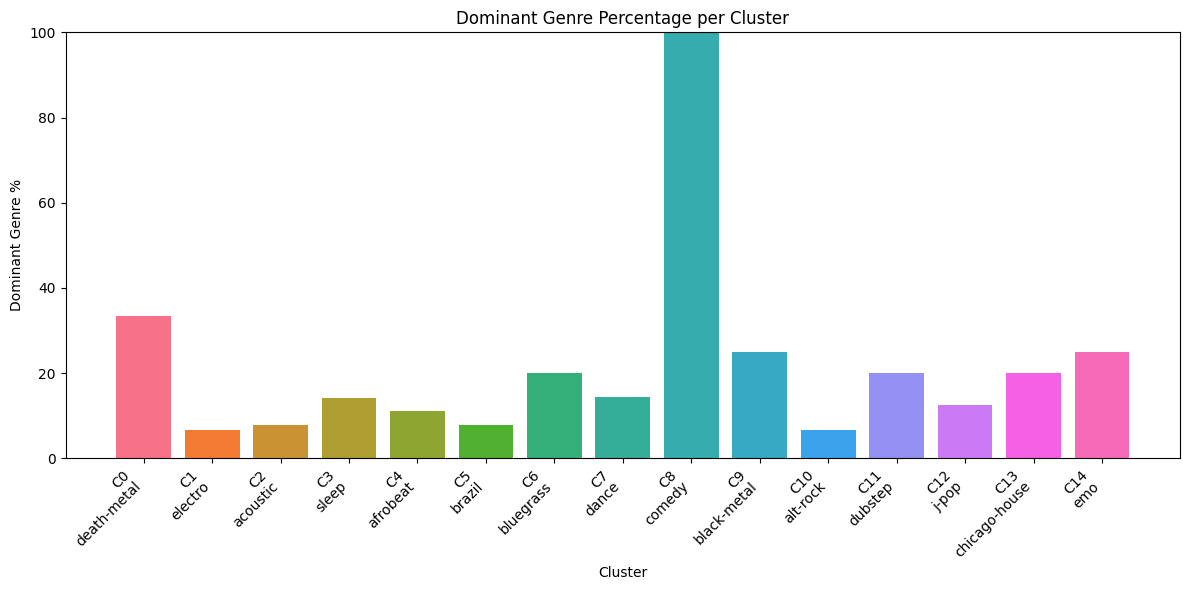

In [34]:
plt.figure(figsize=(12, 6))
bars = plt.bar(range(optimal_k), df_results['Percentage'], color=sns.color_palette("husl", optimal_k))
plt.xlabel('Cluster')
plt.ylabel('Dominant Genre %')
plt.title('Dominant Genre Percentage per Cluster')
plt.xticks(range(optimal_k), [f"C{row['Cluster']}\n{row['Genre'][:15]}" for _, row in df_results.iterrows()], rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Question 6

In [73]:
search_name = "courage".lower().strip()
song_info = df_metadata[df_metadata['track_name'].str.lower().str.strip() == search_name].iloc[0]
song_index = song_info.name

print(f"\nSelected: {song_info['track_name']} - {song_info['artists']} (Cluster {song_info['cluster']})")


Selected: courage - Haruka Tomatsu (Cluster 5)


In [74]:
target_cluster = song_info['cluster']
cluster_indices = df_metadata[df_metadata['cluster'] == target_cluster].index
cluster_vectors = df.loc[cluster_indices]
song_vector = df.loc[song_index]

In [75]:
distances_euclidean = cluster_vectors.apply(lambda row: euclidean(song_vector, row), axis=1)
top_3_euclidean = distances_euclidean.sort_values().index[1:4]
recommendations_euc = df_metadata.loc[top_3_euclidean, ['track_name', 'artists', 'track_genre']]
print("\nTop 3 (Euclidean):")
print(recommendations_euc)


Top 3 (Euclidean):
            track_name        artists track_genre
5801      Kaikai Kitan            Eve       anime
5507  Sing My Pleasure  ヴィヴィ(Vo.八木海莉)       anime
5759       SPARK-AGAIN          Aimer       anime


The recommended pieces are very suitable.

# Question 7

In [76]:
cosine_distances = cluster_vectors.apply(lambda row: cosine(song_vector, row), axis=1)
top_3_cosine = cosine_distances.sort_values().index[1:4]
recommendations_cos = df_metadata.loc[top_3_cosine, ['track_name', 'artists', 'track_genre']]
print("\nTop 3 (Cosine):")
print(recommendations_cos)


Top 3 (Cosine):
            track_name        artists track_genre
5801      Kaikai Kitan            Eve       anime
5507  Sing My Pleasure  ヴィヴィ(Vo.八木海莉)       anime
5759       SPARK-AGAIN          Aimer       anime


The recommended songs are the same as with the other distance.

# Question 8

The implementation was already done with the elbow method as requested earlier.

# Question 9

In [77]:
dbscan = DBSCAN(eps=5.0, min_samples=20, metric='euclidean')
dbscan_labels = dbscan.fit_predict(df)

In [78]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nDBSCAN: {n_clusters_dbscan} clusters, {n_noise} noise points")
print(f"K-Means had {optimal_k} clusters")


DBSCAN: 114 clusters, 390 noise points
K-Means had 15 clusters


As was mentioned above DBSCAN created many times more clusters than K-Means did earlier.